In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

oc_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/overall_oc_combined.csv')
m04_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/overall_m04_combined.csv')
# Preparing the data
features = oc_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox'], axis=1) # Dropping non-numeric and target columns
labels = oc_combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)

print(len(labels))




# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=80)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Due to the nature of Linear Regression (it's not a classifier), we'll handle it separately

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Compute specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(confusion_matrix(y_test, y_pred))

    #cv

    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, features, labels, cv=7)

    
    results[name] = {"Accuracy": acc, "Specificity": specificity, "Sensitivity": sensitivity, "CV": scores.mean()}


print("OC results:", results)


#m04 data

# Preparing the data

features = m04_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox'], axis=1) # Dropping non-numeric and target columns

labels = m04_combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=80)

# Initialize models

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

# Due to the nature of Linear Regression (it's not a classifier), we'll handle it separately

# Train and evaluate models

results = {}

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Compute specificity and sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(confusion_matrix(y_test, y_pred))

    #cv

    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, features, labels, cv=7)

    print("Cross-validated scores:", scores)
    
    results[name] = {"Accuracy": acc, "Specificity": specificity, "Sensitivity": sensitivity, "CV": scores.mean()}

print("M04 results:", results)


92
[[11  2]
 [ 3  7]]
[[9 4]
 [2 8]]
[[7 6]
 [2 8]]
[[8 5]
 [2 8]]
OC results: {'Random Forest': {'Accuracy': 0.782608695652174, 'Specificity': 0.8461538461538461, 'Sensitivity': 0.7, 'CV': 0.7064364207221351}, 'Decision Tree': {'Accuracy': 0.7391304347826086, 'Specificity': 0.6923076923076923, 'Sensitivity': 0.8, 'CV': 0.5667189952904239}, 'Support Vector Machine': {'Accuracy': 0.6521739130434783, 'Specificity': 0.5384615384615384, 'Sensitivity': 0.8, 'CV': 0.565149136577708}, 'Naive Bayes': {'Accuracy': 0.6956521739130435, 'Specificity': 0.6153846153846154, 'Sensitivity': 0.8, 'CV': 0.5777080062794349}}
Random Forest
[[10  3]
 [ 5  5]]
Cross-validated scores: [0.57142857 0.61538462 0.76923077 0.61538462 0.69230769 0.69230769
 0.69230769]
Decision Tree
[[8 5]
 [2 8]]
Cross-validated scores: [0.5        0.53846154 0.61538462 0.53846154 0.53846154 0.76923077
 0.53846154]
Support Vector Machine
[[ 0 13]
 [ 0 10]]
Cross-validated scores: [0.5        0.46153846 0.53846154 0.53846154 0.6153

In [22]:
#decision tree grid search

from sklearn.model_selection import GridSearchCV

# Define the grid

print("Decision Tree Grid Search"
      "=========================")

print(X_test)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results



# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)

# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)


#cross val best dt

scores = cross_val_score(best_dt, features, labels, cv=7)

print("Cross-validated scores:", scores)

# Print results

print("Cross-validated scores:", scores.mean())



Decision Tree Grid Search=========================
        area    extent  surface_area  complexity  sphericity  \
58  344889.0  0.093408  25938.609946   13.296356    0.916904   
55    4985.0  0.113875   1353.149601    3.683998    1.042914   
30  118328.0  0.083429  12837.632336    9.217276    0.907941   
32   49302.0  0.203795   4199.542755   11.739850    1.548312   
74   54123.0  0.114311   7512.038765    7.204835    0.921116   
78   21933.0  0.099356   3112.539732    7.046657    1.217404   
25  112302.0  0.192961   7448.751815   15.076620    1.511213   
87   10734.0  0.108278   2988.700583    3.591527    0.787365   
13  229371.0  0.083841  15570.328226   14.731289    1.163801   
34  223413.0  0.330894   8619.108635   25.920662    2.065828   
72   23883.0  0.045689   9987.196642    2.391362    0.401575   
18  458218.0  0.215485  15734.009533   29.122774    1.826808   
57  489317.0  0.135819  25179.177961   19.433399    1.192622   
54    5751.0  0.143145   1419.340280    4.051882    1

In [37]:
#random search for random forest

from sklearn.model_selection import RandomizedSearchCV

# Define the grid

print("Random Forest Random Search"
      
        "=========================")

param_dist = {
    'n_estimators': [50, 100, 200, 400, 800],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

features = m04_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

labels = m04_combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=80)

# Initialize the classifier

rf = RandomForestClassifier()

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(rf, param_dist, cv=7, scoring='accuracy', random_state=60, error_score='raise')

# Fit the model

random_search.fit(X_train, y_train)

# Get the best parameters

random_search.best_params_

# Get the best estimator

best_rf = random_search.best_estimator_

# Get the best score

random_search.best_score_

# Get the best model

y_pred = best_rf.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(random_search.best_params_)

# Print the best estimator

print(random_search.best_estimator_)

# Print the best score

print(random_search.best_score_)

#save best model pkl

import joblib

joblib.dump(best_rf, 'best_rf.pkl')

# Print the best model

# run best model on m04 data

m04_features = m04_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

m04_labels = m04_combined['Genotype']

m04_labels = le.fit_transform(m04_labels)

m04_pred = best_rf.predict(m04_features)

# Compute accuracy

accuracy_score(m04_labels, m04_pred)

# Compute confusion matrix

confusion_matrix(m04_labels, m04_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(m04_labels, m04_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(m04_labels, m04_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#cross val best rf

#feature importances

best_rf.feature_importances_

#feature importance table with column names

feature_importances = pd.DataFrame(best_rf.feature_importances_, index = features.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)







Random Forest Random Search=========================
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400)
0.6825396825396826
Accuracy:  0.9021739130434783
Specificity:  0.8863636363636364
Sensitivity:  0.9166666666666666
                   importance
extent               0.270386
solidity             0.211160
minor_axis_length    0.112644
sphericity           0.108405
major_axis_length    0.092128
surface_area         0.089345
complexity           0.070255
area                 0.045678


In [35]:
#random search for random forest

from sklearn.model_selection import RandomizedSearchCV

# Define the grid

print("Random Forest Random Search"
      
        "=========================")

param_dist = {
    'n_estimators': [50, 75, 100, 125, 200, 400, 800],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [60, 42, 80, 100]
}

features = oc_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

labels = oc_combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Initialize the classifier

rf = RandomForestClassifier()

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(rf, param_dist, cv=7, scoring='accuracy', error_score='raise')

# Fit the model

random_search.fit(X_train, y_train)

# Get the best parameters

random_search.best_params_

# Get the best estimator

best_rf = random_search.best_estimator_

# Get the best score

random_search.best_score_

# Get the best model

y_pred = best_rf.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(random_search.best_params_)

# Print the best estimator

print(random_search.best_estimator_)

# Print the best score

print(random_search.best_score_)

#save best model pkl

import joblib

joblib.dump(best_rf, 'best_rf.pkl')

# Print the best model

# run best model on m04 data

oc_features = oc_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

oc_labels = oc_combined['Genotype']

oc_labels = le.fit_transform(oc_labels)

oc_pred = best_rf.predict(oc_features)

# Compute accuracy

accuracy_score(oc_labels, oc_pred)

# Compute confusion matrix

confusion_matrix(oc_labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(oc_labels, oc_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(oc_labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#feature importance

importances = best_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
                axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#feature ranking as table with column names
    
feature_ranking = pd.DataFrame({'feature': features.columns[indices], 'importance': importances[indices]})
print(feature_ranking)

#cross val best rf







Random Forest Random Search=========================
{'random_state': 60, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=400, random_state=60)
0.7831168831168831
Accuracy:  0.8804347826086957
Specificity:  0.7727272727272727
Sensitivity:  0.9791666666666666
Feature ranking:
1. feature 5 (0.239748)
2. feature 7 (0.146021)
3. feature 0 (0.131085)
4. feature 3 (0.115354)
5. feature 6 (0.108590)
6. feature 4 (0.094371)
7. feature 2 (0.091035)
8. feature 1 (0.073795)
             feature  importance
0  major_axis_length    0.239748
1           solidity    0.146021
2               area    0.131085
3         complexity    0.115354
4  minor_axis_length    0.108590
5         sphericity    0.094371
6       surface_area    0.091035
7             extent    0.073795


In [41]:
#m04 and oc combined data with suffix

oc_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/overall_oc_combined.csv')
m04_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/overall_m04_combined.csv')

#combine on genotype and image name

combined = pd.merge(oc_combined, m04_combined, on=['image_name'], suffixes=('_oc', '_m04'))

print(combined)

#save combined

combined.to_csv('/Users/katherineridley/Projects/PlaqueStack/combined.csv', index=False)


     area_oc  extent_oc                                        centroid_oc  \
0    49708.0   0.108344  (10.383499637885249, 207.8267079745715, 186.67...   
1   211843.0   0.060366  (8.80452976968793, 204.1593444201602, 215.1165...   
2    30352.0   0.019535  (11.36864127569847, 93.16206510279389, 81.5648...   
3   207020.0   0.085551  (17.66671336102792, 211.47166457347117, 218.41...   
4    71567.0   0.141890  (9.370198555200023, 201.27167549289476, 203.11...   
..       ...        ...                                                ...   
87   37524.0   0.140146  (10.099802792879224, 154.47716128344527, 223.3...   
88   49387.0   0.143861  (19.530240751614798, 199.7198655516634, 204.41...   
89   35307.0   0.036235  (21.306596425637977, 214.30110176452263, 232.6...   
90  111132.0   0.118804  (10.211667206565165, 242.03659611992944, 196.3...   
91   51064.0   0.019419  (18.697653924486918, 215.1656548644838, 249.31...   

    surface_area_oc  complexity_oc  sphericity_oc  major_axis_l

In [43]:
#random search for random forest

from sklearn.model_selection import RandomizedSearchCV

# Define the grid

print("Random Forest Random Search"
      
        "=========================")

param_dist = {
    'n_estimators': [50, 75, 100, 125, 200, 400, 800],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [60, 42, 80, 100]
}

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/combined.csv')
features = combined.drop(['Genotype', 'image_name', 'centroid_oc', 'bbox_oc', 'centroid_m04', 'bbox_m04'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Initialize the classifier

rf = RandomForestClassifier()

# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(rf, param_dist, cv=7, scoring='accuracy', error_score='raise')

# Fit the model

random_search.fit(X_train, y_train)

# Get the best parameters

random_search.best_params_

# Get the best estimator

best_rf = random_search.best_estimator_

# Get the best score

random_search.best_score_

# Get the best model

y_pred = best_rf.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(random_search.best_params_)

# Print the best estimator

print(random_search.best_estimator_)

# Print the best score

print(random_search.best_score_)

#save best model pkl

import joblib

joblib.dump(best_rf, 'best_rf.pkl')

# Print the best model

# run best model on m04 data

oc_features = combined.drop(['Genotype', 'image_name', 'centroid_oc', 'bbox_oc', 'centroid_m04', 'bbox_m04'], axis=1) # Dropping non-numeric and target columns

oc_labels = combined['Genotype']

oc_labels = le.fit_transform(oc_labels)

oc_pred = best_rf.predict(oc_features)

# Compute accuracy

accuracy_score(oc_labels, oc_pred)

# Compute confusion matrix

confusion_matrix(oc_labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(oc_labels, oc_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(oc_labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#feature importance

importances = best_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
                axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#feature ranking as table with column names
    
feature_ranking = pd.DataFrame({'feature': features.columns[indices], 'importance': importances[indices]})
print(feature_ranking)

#cross val best rf







Random Forest Random Search=========================
{'random_state': 42, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}
RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=50,
                       random_state=42)
0.7623376623376624
Accuracy:  0.8804347826086957
Specificity:  0.8636363636363636
Sensitivity:  0.8958333333333334
Feature ranking:
1. feature 5 (0.127932)
2. feature 8 (0.120080)
3. feature 7 (0.094271)
4. feature 2 (0.067847)
5. feature 3 (0.061064)
6. feature 16 (0.059625)
7. feature 0 (0.055042)
8. feature 10 (0.053228)
9. feature 9 (0.047887)
10. feature 12 (0.047413)
11. feature 1 (0.046821)
12. feature 14 (0.043651)
13. feature 13 (0.043467)
14. feature 6 (0.042486)
15. feature 11 (0.040385)
16. feature 4 (0.030620)
17. feature 15 (0.018182)
                  feature  importance
0    major_axis_length_oc    0.127932
1            volume_ratio    0.120080
2             soli

Decision Tree Grid Search=========================
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
0.7677777777777778
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10)
Accuracy:  0.8804347826086957
Specificity:  0.8636363636363636
Sensitivity:  0.8958333333333334
Feature ranking:
1. feature 5 (0.127932)
2. feature 8 (0.120080)
3. feature 7 (0.094271)
4. feature 2 (0.067847)
5. feature 3 (0.061064)
6. feature 16 (0.059625)
7. feature 0 (0.055042)
8. feature 10 (0.053228)
9. feature 9 (0.047887)
10. feature 12 (0.047413)
11. feature 1 (0.046821)
12. feature 14 (0.043651)
13. feature 13 (0.043467)
14. feature 6 (0.042486)
15. feature 11 (0.040385)
16. feature 4 (0.030620)
17. feature 15 (0.018182)
                  feature  importance
0    major_axis_length_

[Text(0.5909090909090909, 0.9166666666666666, 'solidity_oc <= 0.191\nentropy = 0.997\nsamples = 73\nvalue = [34, 39]\nclass = APPPS1xFIRE'),
 Text(0.36363636363636365, 0.75, 'volume_ratio <= 0.367\nentropy = 0.943\nsamples = 50\nvalue = [32, 18]\nclass = APPPS1'),
 Text(0.18181818181818182, 0.5833333333333334, 'sphericity_m04 <= 0.905\nentropy = 0.529\nsamples = 25\nvalue = [22, 3]\nclass = APPPS1'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = APPPS1'),
 Text(0.2727272727272727, 0.4166666666666667, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = APPPS1'),
 Text(0.5454545454545454, 0.5833333333333334, 'solidity_oc <= 0.142\nentropy = 0.971\nsamples = 25\nvalue = [10, 15]\nclass = APPPS1xFIRE'),
 Text(0.45454545454545453, 0.4166666666666667, 'extent_oc <= 0.06\nentropy = 0.998\nsamples = 19\nvalue = [10, 9]\nclass = APPPS1'),
 Text(0.36363636363636365, 0.25, 'minor_axis_length_oc <= 30.874\nentropy = 0.94\nsamples = 14\nval

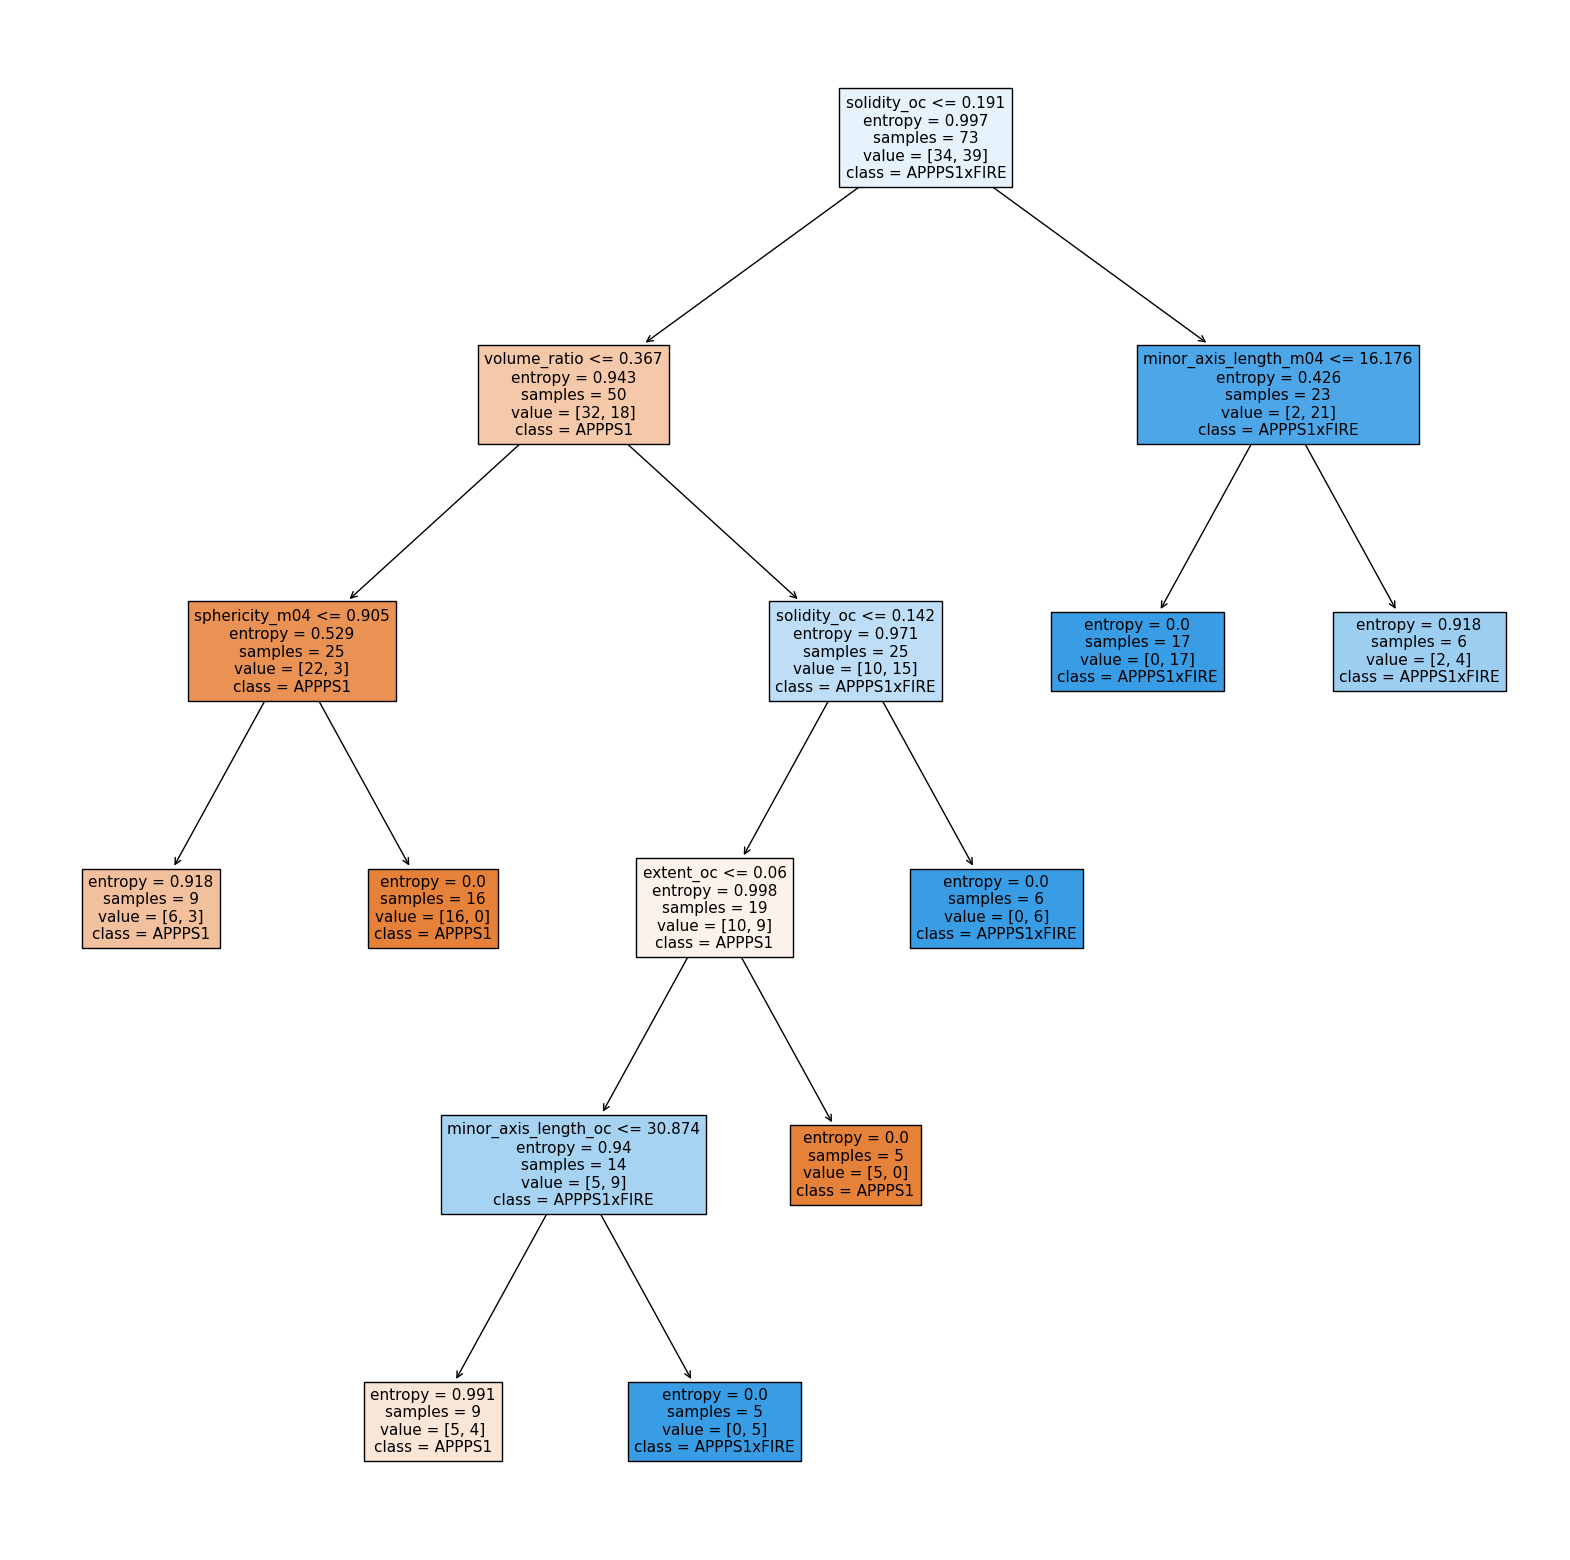

In [47]:
#decision tree grid search

from sklearn.model_selection import GridSearchCV

# Define the grid

print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Print the best model

# run best model on m04 data

oc_features = combined.drop(['Genotype', 'image_name', 'centroid_oc', 'bbox_oc', 'centroid_m04', 'bbox_m04'], axis=1) # Dropping non-numeric and target columns

oc_labels = combined['Genotype']

oc_labels = le.fit_transform(oc_labels)

oc_pred = best_rf.predict(oc_features)

# Compute accuracy

accuracy_score(oc_labels, oc_pred)

# Compute confusion matrix

confusion_matrix(oc_labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(oc_labels, oc_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(oc_labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#feature importance

importances = best_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
                axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#feature ranking as table with column names
    
feature_ranking = pd.DataFrame({'feature': features.columns[indices], 'importance': importances[indices]})
print(feature_ranking)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APPPS1', 'APPPS1xFIRE'])




Decision Tree Grid Search=========================
        area    extent                                           centroid  \
0    49708.0  0.108344  (10.383499637885249, 207.8267079745715, 186.67...   
1   211843.0  0.060366  (8.80452976968793, 204.1593444201602, 215.1165...   
2    30352.0  0.019535  (11.36864127569847, 93.16206510279389, 81.5648...   
3   207020.0  0.085551  (17.66671336102792, 211.47166457347117, 218.41...   
4    71567.0  0.141890  (9.370198555200023, 201.27167549289476, 203.11...   
..       ...       ...                                                ...   
87   37524.0  0.140146  (10.099802792879224, 154.47716128344527, 223.3...   
88   49387.0  0.143861  (19.530240751614798, 199.7198655516634, 204.41...   
89   35307.0  0.036235  (21.306596425637977, 214.30110176452263, 232.6...   
90  111132.0  0.118804  (10.211667206565165, 242.03659611992944, 196.3...   
91   51064.0  0.019419  (18.697653924486918, 215.1656548644838, 249.31...   

    surface_area  comple

[Text(0.5, 0.9166666666666666, 'major_axis_length <= 292.205\nentropy = 0.997\nsamples = 73\nvalue = [34, 39]\nclass = APPPS1xFIRE'),
 Text(0.2, 0.75, 'solidity <= 0.106\nentropy = 0.722\nsamples = 35\nvalue = [7, 28]\nclass = APPPS1xFIRE'),
 Text(0.1, 0.5833333333333334, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = APPPS1'),
 Text(0.3, 0.5833333333333334, 'minor_axis_length <= 14.367\nentropy = 0.469\nsamples = 30\nvalue = [3, 27]\nclass = APPPS1xFIRE'),
 Text(0.2, 0.4166666666666667, 'extent <= 0.113\nentropy = 0.696\nsamples = 16\nvalue = [3, 13]\nclass = APPPS1xFIRE'),
 Text(0.1, 0.25, 'entropy = 0.918\nsamples = 9\nvalue = [3, 6]\nclass = APPPS1xFIRE'),
 Text(0.3, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = APPPS1xFIRE'),
 Text(0.4, 0.4166666666666667, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = APPPS1xFIRE'),
 Text(0.8, 0.75, 'solidity <= 0.197\nentropy = 0.868\nsamples = 38\nvalue = [27, 11]\nclass = APPPS1'),
 Text(0.7, 0.5833333333333334, 's

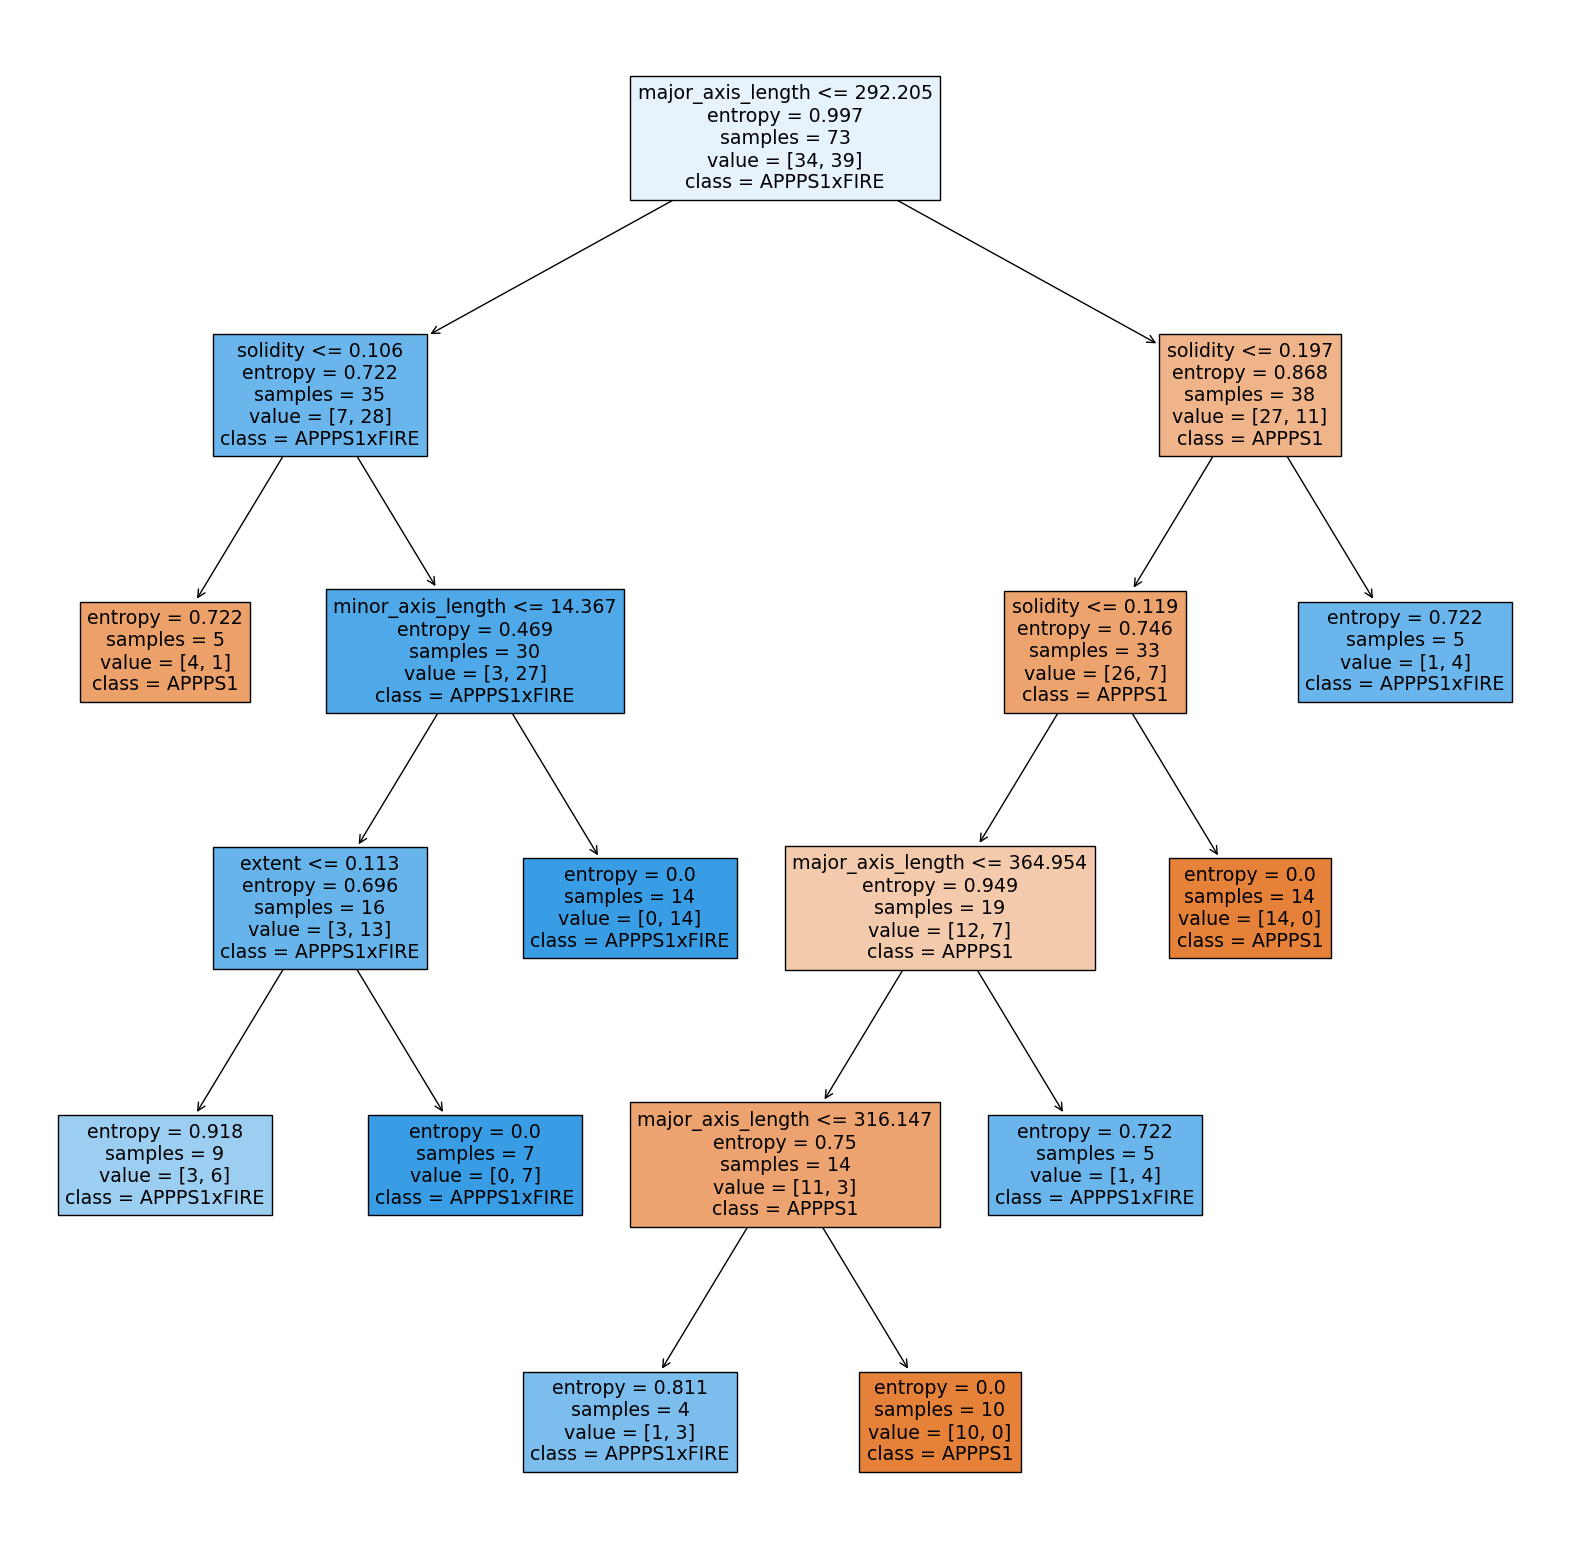

In [54]:
#decision tree grid search

from sklearn.model_selection import GridSearchCV

# Define the grid

print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

print(oc_combined)

oc_features = oc_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

oc_labels = oc_combined['Genotype']

oc_labels = le.fit_transform(oc_labels)

X_train, X_test, y_train, y_test = train_test_split(oc_features, oc_labels, test_size=0.2)


dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Print the best model

# run best model on m04 data

oc_features = oc_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

oc_labels = oc_combined['Genotype']

oc_labels = le.fit_transform(oc_labels)

oc_pred = best_dt.predict(oc_features)

# Compute accuracy

accuracy_score(oc_labels, oc_pred)

# Compute confusion matrix

confusion_matrix(oc_labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(oc_labels, oc_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(oc_labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#feature importance

importances = best_dt.feature_importances_

std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
                axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#feature ranking as table with column names
    
feature_ranking = pd.DataFrame({'feature': oc_features.columns[indices], 'importance': importances[indices]})
print(feature_ranking)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plot_tree(best_dt, filled=True, feature_names=oc_features.columns, class_names=['APPPS1', 'APPPS1xFIRE'])




Decision Tree Grid Search=========================
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 20}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=20)
0.6695238095238095
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=20)
Accuracy:  0.7608695652173914
Specificity:  0.9545454545454546
Sensitivity:  0.5833333333333334
Feature ranking:
1. feature 7 (0.411525)
2. feature 1 (0.302759)
3. feature 2 (0.285716)
4. feature 6 (0.000000)
5. feature 5 (0.000000)
6. feature 4 (0.000000)
7. feature 3 (0.000000)
8. feature 0 (0.000000)
             feature  importance
0           solidity    0.411525
1             extent    0.302759
2       surface_area    0.285716
3  minor_axis_length    0.000000
4  major_axis_length    0.000000
5         sphericity    0.000000
6         complexity    0.000000
7               area    0.00

[Text(0.7777777777777778, 0.9285714285714286, 'solidity <= 0.466\nentropy = 1.0\nsamples = 73\nvalue = [37, 36]\nclass = APPPS1'),
 Text(0.6666666666666666, 0.7857142857142857, 'surface_area <= 14025.96\nentropy = 0.973\nsamples = 62\nvalue = [37, 25]\nclass = APPPS1'),
 Text(0.5555555555555556, 0.6428571428571429, 'surface_area <= 12032.78\nentropy = 0.994\nsamples = 55\nvalue = [30.0, 25.0]\nclass = APPPS1'),
 Text(0.4444444444444444, 0.5, 'extent <= 0.202\nentropy = 0.971\nsamples = 50\nvalue = [30, 20]\nclass = APPPS1'),
 Text(0.3333333333333333, 0.35714285714285715, 'extent <= 0.179\nentropy = 0.994\nsamples = 44\nvalue = [24, 20]\nclass = APPPS1'),
 Text(0.2222222222222222, 0.21428571428571427, 'solidity <= 0.275\nentropy = 0.949\nsamples = 38\nvalue = [24, 14]\nclass = APPPS1'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.439\nsamples = 11\nvalue = [10, 1]\nclass = APPPS1'),
 Text(0.3333333333333333, 0.07142857142857142, 'entropy = 0.999\nsamples = 27\nvalue = [1

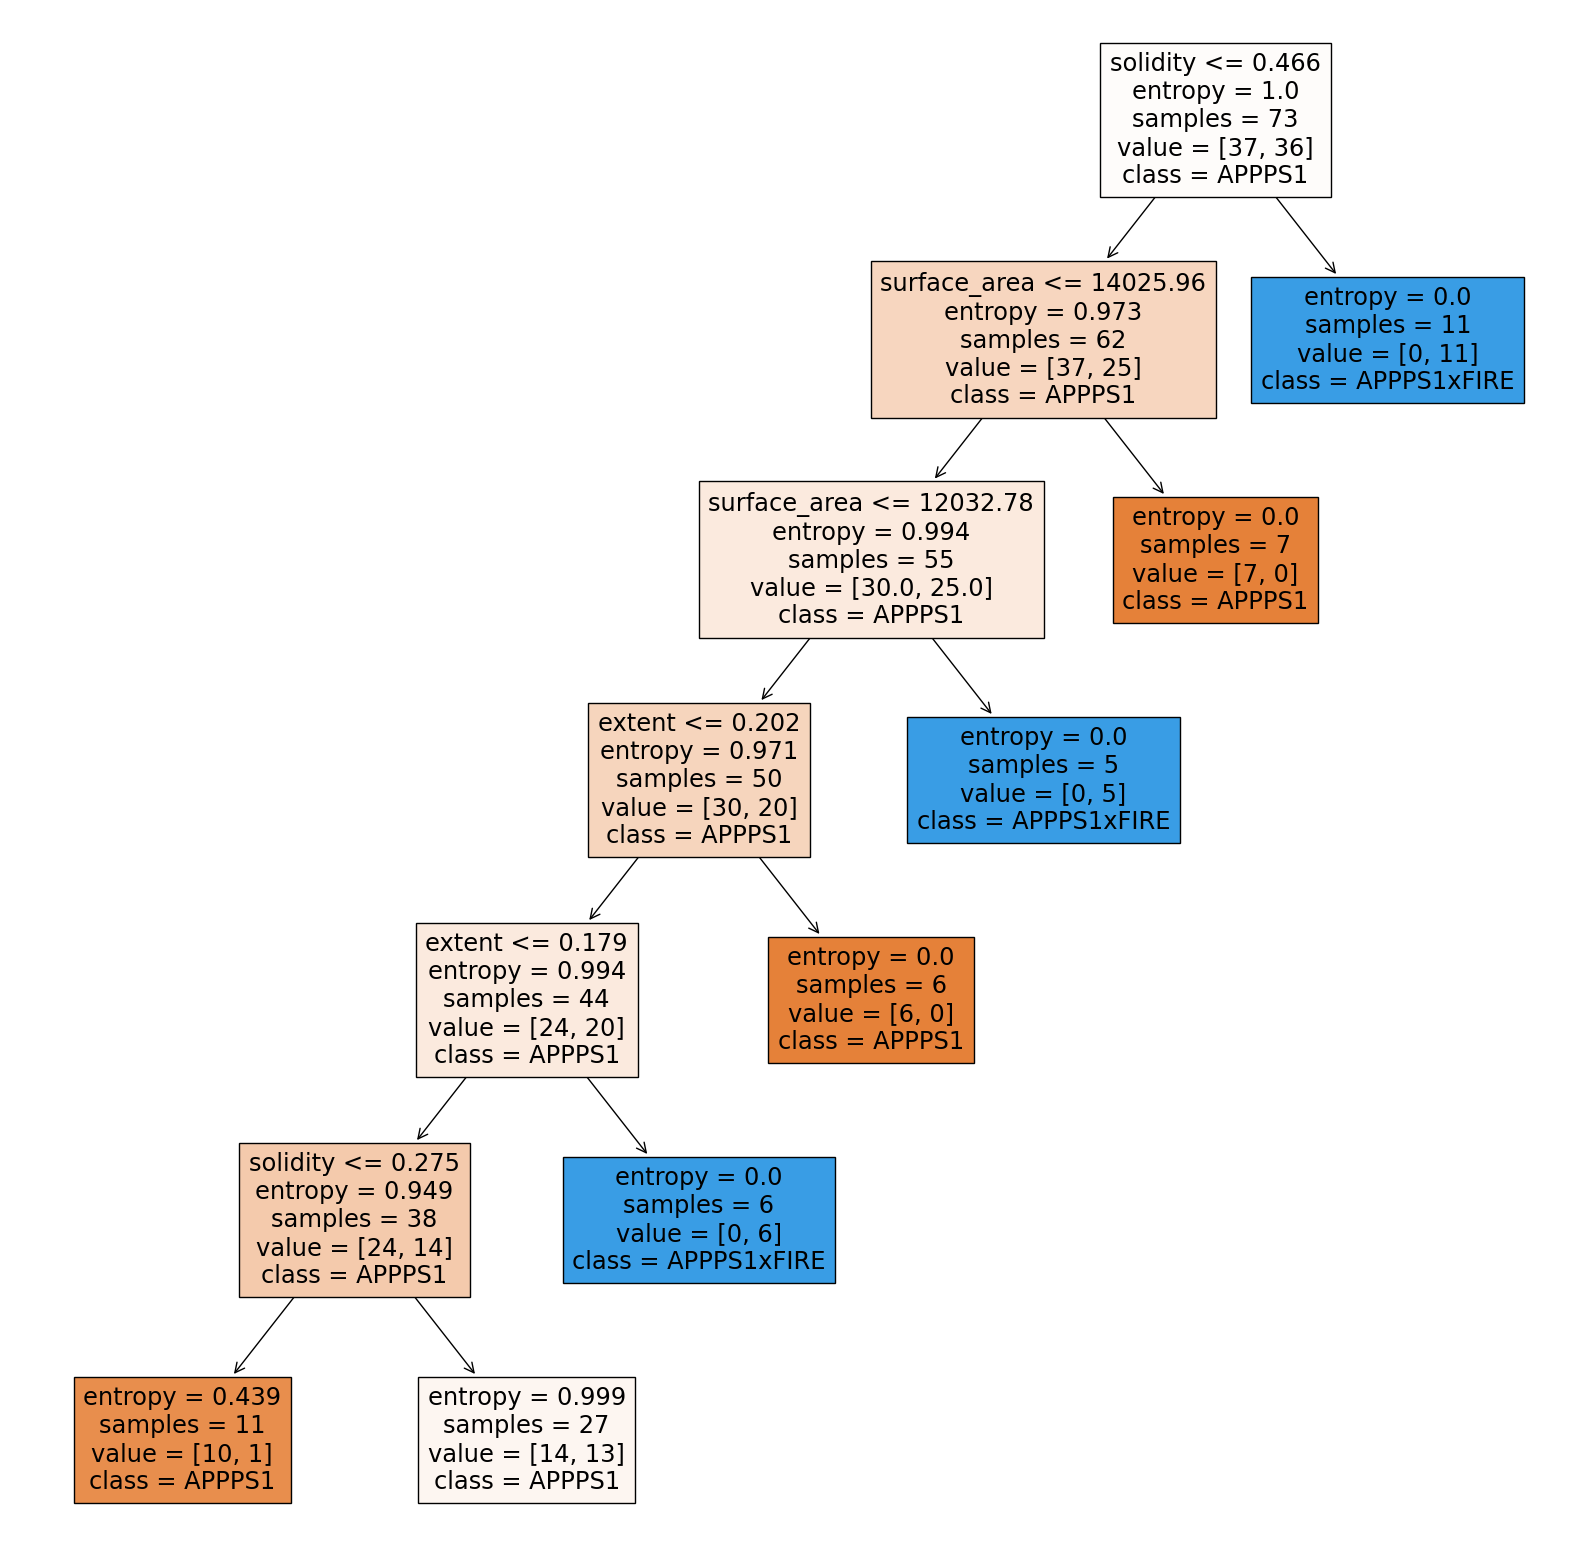

In [63]:
#decision tree grid search

from sklearn.model_selection import GridSearchCV

# Define the grid

print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}



m04_features = m04_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

m04_labels = m04_combined['Genotype']

m04_labels = le.fit_transform(m04_labels)

X_train, X_test, y_train, y_test = train_test_split(m04_features, m04_labels, test_size=0.2)


dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Print the best model

# run best model on m04 data

m04_features = m04_combined.drop(['Genotype', 'image_name', 'centroid', 'bbox', 'volume_ratio'], axis=1) # Dropping non-numeric and target columns

m04_labels = m04_combined['Genotype']

m04_labels = le.fit_transform(m04_labels)

m04_pred = best_dt.predict(m04_features)

# Compute accuracy

accuracy_score(m04_labels, m04_pred)

# Compute confusion matrix

confusion_matrix(m04_labels, m04_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(m04_labels, m04_pred, labels=np.unique(m04_labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(m04_labels, m04_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#feature importance

importances = best_dt.feature_importances_

indices = np.argsort(importances)[::-1]
# Print the feature ranking

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#feature ranking as table with column names
    
feature_ranking = pd.DataFrame({'feature': m04_features.columns[indices], 'importance': importances[indices]})
print(feature_ranking)


#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plot_tree(best_dt, filled=True, feature_names=m04_features.columns, class_names=['APPPS1', 'APPPS1xFIRE'])


